In [ ]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras
import random

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score

In [ ]:
from keras.models import load_model

In [ ]:
train_path = r'D:\university\Thesis\secondary dataset\archive_2\1training'
test_path = r'D:\university\Thesis\secondary dataset\archive_2\2testing'
val_path = r'D:\university\Thesis\secondary dataset\archive_2\3vali'

In [ ]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [ ]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [7]:
size = (250,250)

In [ ]:
train = imagearray(train_path, size)

In [9]:
test = imagearray(test_path, size)

In [10]:
val = imagearray(val_path, size)

In [11]:
x_train = np.array(train)

In [12]:
x_test = np.array(test)

In [13]:
x_val = np.array(val)

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [15]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2,
                                 vertical_flip=True,
                                 horizontal_flip=True,
                                 shear_range=0.2,
                                 rotation_range=20,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 1,
                                          class_mode = class_mode)
    return classes

In [16]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 2991 images belonging to 3 classes.
Found 854 images belonging to 3 classes.
Found 428 images belonging to 3 classes.


In [17]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [18]:
train_class.class_indices

{'Bloom': 0, 'Post Bloom': 1, 'Pre Bloom': 2}

In [19]:
y_train.shape,y_test.shape,y_val.shape

((2991,), (854,), (428,))

In [20]:
tf.keras.backend.clear_session()

In [21]:
model1_1 = load_model(r'C:\Users\faysa\Desktop\Flower_Recognition\final\save model\model1.hdf5')
model2_1 = load_model(r'C:\Users\faysa\Desktop\Flower_Recognition\final\save model\model2.hdf5')
model3_1 = load_model(r'C:\Users\faysa\Desktop\Flower_Recognition\final\save model\model3.hdf5')

In [22]:
tf.keras.backend.clear_session()

In [23]:
#history3 = model1_1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 3,batch_size =1,shuffle=True)

In [24]:
#tf.keras.backend.clear_session()

In [25]:
#history5 = model2_1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 3,batch_size =1,shuffle=True)

In [26]:
#tf.keras.backend.clear_session()

In [27]:
#history6 = model3_1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 3,batch_size =1,shuffle=True)

In [28]:
models = [model1_1, model2_1, model3_1]
#models = [model2_1, model3_1]
#models = [model1_1, model2_1]

In [36]:
tf.keras.backend.clear_session()

In [31]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

#Accuracy

In [32]:
ensemble_prediction = np.argmax(summed, axis=1) #1

In [38]:
prediction1 = model1_1.predict(x_test) #1

In [39]:
prediction2 = model2_1.predict(x_test) #1

In [40]:
prediction3 = model3_1.predict(x_test) #1

In [41]:
prediction1_1 = np.argmax(prediction1,axis=1) #1

In [42]:
prediction2_1 = np.argmax(prediction2,axis=1) #1

In [43]:
prediction3_1 = np.argmax(prediction3,axis=1) #1

In [44]:
accuracy1 = accuracy_score(y_test, prediction1_1) #1

In [45]:
accuracy2 = accuracy_score(y_test, prediction2_1) #1

In [46]:
accuracy3 = accuracy_score(y_test, prediction3_1) #1

In [47]:
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction) #1

In [48]:
print('Accuracy Score for model1 = ', accuracy1) #1
print('Accuracy Score for model2 = ', accuracy2) #1
print('Accuracy Score for model3 = ', accuracy3) #1

print('Accuracy Score for average ensemble = ', ensemble_accuracy) #1

Accuracy Score for model1 =  0.8021077283372365
Accuracy Score for model2 =  0.8056206088992974
Accuracy Score for model3 =  0.8243559718969555
Accuracy Score for average ensemble =  0.8126463700234192


In [49]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [50]:
classes=['Bloom','Post Bloom','Pre Bloom']

In [51]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
bin_arr = np.bincount(y_train)
# Get count of True elements in a numpy array
count = bin_arr[0]
print('Print count of True elements in array: ', count)
count = bin_arr[1]
print('Print count of True elements in array: ', count)
count = bin_arr[2]
print('Print count of True elements in array: ', count)

Print count of True elements in array:  2338
Print count of True elements in array:  226
Print count of True elements in array:  427


In [53]:
from keras.preprocessing import image
import numpy as np
import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(r"D:\university\Thesis\Dataset -20221005T155507Z-002\New folder (3)\2testing\Bloom\289331310_178803714506567_4871144234835457451_n.jpg")

img_pred=tf.keras.utils.load_img(r"D:\university\Thesis\Dataset -20221005T155507Z-002\New folder (3)\2testing\Bloom\289331310_178803714506567_4871144234835457451_n.jpg",target_size=(250,250,3))
img_pred=tf.keras.preprocessing.image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
img_pred=img_pred/255


preds = [model.predict(img_pred) for model in models]

print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

m2 = np.amax(preds[1][0])
p2 = list(preds[1][0]).index(m2)

m3 = np.amax(preds[2][0])
p3 = list(preds[2][0]).index(m3)

find = {m1:p1, m2:p2, m3:p3}

max = np.amax([m1,m2,m3])

classes[find[max]]

#print(max)

SyntaxError: invalid syntax (3353634173.py, line 9)

381
0


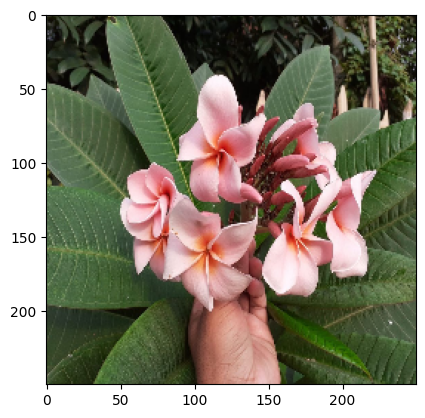

'Bloom'

In [486]:
#4
from keras.preprocessing import image
import numpy as np
import keras

img_sample=random.randint(0,len(y_test))

print(img_sample)
print(y_test[img_sample])

plt.imshow(cv2.cvtColor(x_test[img_sample, :].astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()

img_pred=(x_test[img_sample, :].astype('float32'))
img_pred=np.expand_dims(img_pred, axis=0)
#img_pred=img_pred/255

preds = [model.predict(img_pred) for model in models]

#print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

m2 = np.amax(preds[1][0])
p2 = list(preds[1][0]).index(m2)

m3 = np.amax(preds[2][0])
p3 = list(preds[2][0]).index(m3)

find = {m1:p1, m2:p2, m3:p3}

max = np.amax([m1,m2,m3])

#print(max)

classes[find[max]]



In [388]:
"""img_pred=tf.keras.preprocessing.image.load_img(r"D:\university\Thesis\final\Flower kath golap\New folder (2)\2testing\Bloom\308053305_1449098615596168_2969989795604413069_n.jpg",target_size = (250,250))
img_pred=tf.keras.preprocessing.image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
img_pred=img_pred/255

preds = [model.predict(img_pred) for model in models]

print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

m2 = np.amax(preds[1][0])
p2 = list(preds[1][0]).index(m2)

m3 = np.amax(preds[2][0])
p3 = list(preds[2][0]).index(m3)

find = {m1:p1, m2:p2, m3:p3}

max = np.amax([m1,m2,m3])


classes[find[max]]


SyntaxError: EOF while scanning triple-quoted string literal (765867934.py, line 24)

In [ ]:
#4
from keras.preprocessing import image
import numpy as np
import keras

img_sample=random.randint(0,len(y_test))

print(img_sample)

plt.imshow(cv2.cvtColor(x_test[img_sample, :].astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()

img_pred=(x_test[img_sample, :].astype('float32'))
img_pred=np.expand_dims(img_pred, axis=0)
img_pred=img_pred/255

preds = [model.predict(img_pred) for model in models]

print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

m2 = np.amax(preds[1][0])
p2 = list(preds[1][0]).index(m2)

m3 = np.amax(preds[2][0])
p3 = list(preds[2][0]).index(m3)

find = {m1:p1, m2:p2, m3:p3}

max = np.amax([m1,m2,m3])


classes[find[max]]


In [ ]:
print("preds[0][0]: ",preds[0][0])
m1 = np.amax(preds[0][0])
print("m1: ",m1)
p1 = list(preds[0][0]).index(m1)
print("p1: ",p1)

print("preds[1][0]: ",preds[1][0])
m2 = np.amax(preds[1][0])
print("m2: ",m2)
p2 = list(preds[1][0]).index(m2)
print("p2: ",p2)

print("preds[2][0]: ",preds[2][0])
m3 = np.amax(preds[2][0])
print("m3: ",m3)
p3 = list(preds[2][0]).index(m3)
print("p3: ",p3)

find = {m1:p1, m2:p2, m3:p3}
print("find: ",find)

max = np.amax([m1,m2,m3])
print("max: ",max)

classes[find[max]]
print(find[max])

In [49]:
plt.figure(figsize=(10, 8))
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.legend()
plt.title('loss')
plt.show()

NameError: name 'history1' is not defined

<Figure size 1000x800 with 0 Axes>